# K-Nearest Neighbours - Machine learning algorithm

This notebook is based on the tutorial on Tech with Tim's YouTube Channel.

https://www.youtube.com/watch?v=45ryDIPHdGg
    
Dataset from https://archive.ics.uci.edu/ml/datasets.php    

<img src = https://cambridgecoding.files.wordpress.com/2016/01/knn2.jpg width=500>

## What is KNN? 

KNN is a model that classifies data points based on the points that are most similar to it. It uses test data to make an “educated guess” on what an unclassified point should be classified as.

KNN is an algorithm that is considered both non-parametric and an example of lazy learning. What do these two terms mean exactly?

* Non-parametric means that it makes no assumptions. The model is made up entirely from the data given to it rather than assuming its structure is normal.
* Lazy learning means that the algorithm makes no generalizations. This means that there is little training involved when using this method. Because of this, all of the training data is also used in testing when using KNN.

### Pros

* This algorithm is one of the more simple techniques used in machine learning - Easy to use
* Quick calculation time
* Does not make any assumptions about the data (e.g. normal distribution)

### Cons

* Accuracy depends on the quality of the data
* Must find an optimal k value (number of nearest neighbours)
* Poor at classifying data points in a boundary where they can be classified one way or another (ambiguity)
* KNN is very time consuming to model each time as it has to compute the distance between neighbouring points for each point
* Difficult to save it as a model as it has to save the training data for each cluster 
* Useless to train beforehand because it constantly has to keep looking at every data point before it can make a prediction

For more detailed information on KNN, visit: https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26

# In this kernel, we will look at a car evaluation dataset to determine which attributes affect the quality/class of the vehicle. (classification problem)

In [1]:
# Import libraries

# Data analysis
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import style

# Machine learning
import sklearn
from sklearn import linear_model, preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn import metrics

In [2]:
data = pd.read_csv('car.data')
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# Need to convert all the data into appropriate types
# Need to convert the 'vhigh', 'unacc' into integer values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Dealing with irregular data - Encoding

In [4]:
# SKlearn comes with preprocessing to help to convert into appropriate integer values
# Encodes the labels into integers which can then be decoded later on
# Convert non-numerical data into numerical
# Use list instead of numpy or pandas df

le = preprocessing.LabelEncoder()

buying = le.fit_transform(list(data['buying']))
maint = le.fit_transform(list(data['maint']))
doors = le.fit_transform(list(data['doors']))
persons = le.fit_transform(list(data['persons']))
lug_boot = le.fit_transform(list(data['lug_boot']))
safety = le.fit_transform(list(data['safety']))
cls = le.fit_transform(list(data['class']))

print(buying)
print(cls)

[3 3 3 ... 1 1 1]
[2 2 2 ... 2 1 3]


# Modelling

In [5]:
predict = 'class'

In [6]:
x = list(zip(buying, maint, doors, persons, lug_boot, safety)) # features
y = list(cls) # label

In [7]:
# K is a hyperparameter that needs to be an odd number to avoid ambiguity
# If K is too high, then it might be clustered into the wrong group

In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1, random_state=1)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
acc
# print(x_train, y_test)

0.9364161849710982

In [13]:
# Finding the range of accuracies
best = 0
for _ in range(30): # Repeats up to 30 times to find the best accuracy value score
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    
    model = KNeighborsClassifier(n_neighbors=9)
    
    model.fit(x_train, y_train)
    
    acc = model.score(x_test, y_test)
    print (acc)
    if acc > best:
        best = acc
print('The best value is:', best)

0.9421965317919075
0.9017341040462428
0.953757225433526
0.9364161849710982
0.9248554913294798
0.9653179190751445
0.953757225433526
0.9132947976878613
0.9190751445086706
0.976878612716763
0.8901734104046243
0.9364161849710982
0.930635838150289
0.9364161849710982
0.8959537572254336
0.9595375722543352
0.9132947976878613
0.9017341040462428
0.930635838150289
0.9421965317919075
0.9479768786127167
0.953757225433526
0.9132947976878613
0.930635838150289
0.9653179190751445
0.9248554913294798
0.9421965317919075
0.9017341040462428
0.8959537572254336
0.9248554913294798
The best value is: 0.976878612716763


# Hypertuning - finding the best K value

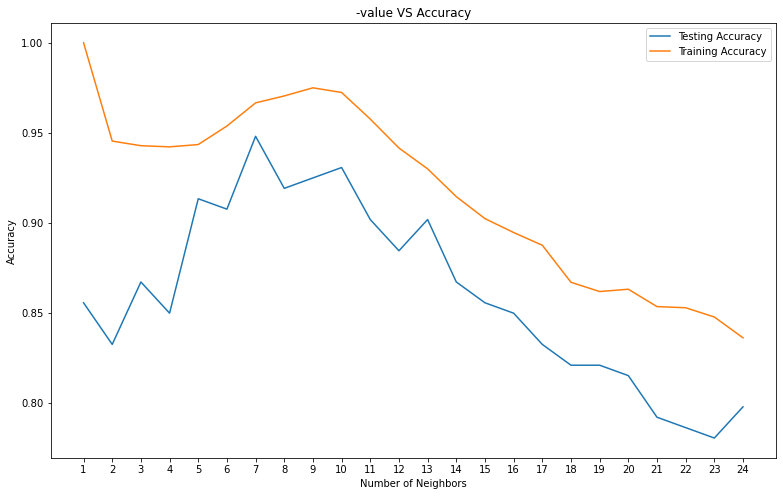

Best accuracy is 0.9479768786127167 with K = 7


In [14]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

## GridSearch CV for model tuning

**What is grid search?**

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. 

This is significant as the performance of the entire model is based on the hyper parameter values specified.

More information here: https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

params = {
    'n_neighbors' : list(range(5,8)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_kn = GridSearchCV(estimator = kn,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)

grid_kn.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   18.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 6, 7],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [40]:
# extract best estimator
print(grid_kn.best_estimator_)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')


In [41]:
# to test the bestfit
print(grid_kn.score(x_test, y_test))

0.9479768786127167


# Model Validation

In [12]:
predicted = model.predict(x_test)

for x in range(len(x_test)):
    print('Predicted: ', predicted[x], 'Data: ', x_test[x], 'Actual: ', y_test[x])

Predicted:  2 Data:  (2, 1, 1, 0, 0, 1) Actual:  2
Predicted:  2 Data:  (0, 0, 0, 0, 2, 1) Actual:  2
Predicted:  2 Data:  (1, 2, 3, 0, 1, 1) Actual:  2
Predicted:  2 Data:  (2, 2, 0, 0, 1, 0) Actual:  2
Predicted:  2 Data:  (1, 1, 1, 2, 0, 1) Actual:  2
Predicted:  2 Data:  (0, 3, 3, 2, 1, 0) Actual:  2
Predicted:  2 Data:  (1, 3, 2, 2, 2, 1) Actual:  2
Predicted:  2 Data:  (3, 2, 1, 0, 2, 1) Actual:  2
Predicted:  0 Data:  (0, 0, 3, 2, 0, 0) Actual:  0
Predicted:  2 Data:  (2, 1, 1, 1, 0, 1) Actual:  2
Predicted:  0 Data:  (0, 2, 3, 2, 1, 2) Actual:  0
Predicted:  2 Data:  (0, 1, 1, 0, 2, 0) Actual:  2
Predicted:  2 Data:  (1, 3, 0, 1, 2, 2) Actual:  2
Predicted:  2 Data:  (3, 3, 0, 0, 0, 0) Actual:  2
Predicted:  2 Data:  (0, 0, 3, 0, 0, 0) Actual:  2
Predicted:  3 Data:  (1, 1, 2, 2, 1, 0) Actual:  3
Predicted:  2 Data:  (0, 0, 1, 0, 2, 1) Actual:  2
Predicted:  0 Data:  (0, 1, 0, 2, 0, 0) Actual:  0
Predicted:  3 Data:  (2, 1, 3, 1, 1, 0) Actual:  3
Predicted:  2 Data:  (1, 2, 3, 

# Decoding the target

In [13]:
names = ['unacc', 'acc', 'good', 'vgood']

for x in range(len(x_test)):
    print('Predicted: ', names[predicted[x]], 'Data: ', x_test[x], 'Actual: ', names[y_test[x]])

Predicted:  good Data:  (2, 1, 1, 0, 0, 1) Actual:  good
Predicted:  good Data:  (0, 0, 0, 0, 2, 1) Actual:  good
Predicted:  good Data:  (1, 2, 3, 0, 1, 1) Actual:  good
Predicted:  good Data:  (2, 2, 0, 0, 1, 0) Actual:  good
Predicted:  good Data:  (1, 1, 1, 2, 0, 1) Actual:  good
Predicted:  good Data:  (0, 3, 3, 2, 1, 0) Actual:  good
Predicted:  good Data:  (1, 3, 2, 2, 2, 1) Actual:  good
Predicted:  good Data:  (3, 2, 1, 0, 2, 1) Actual:  good
Predicted:  unacc Data:  (0, 0, 3, 2, 0, 0) Actual:  unacc
Predicted:  good Data:  (2, 1, 1, 1, 0, 1) Actual:  good
Predicted:  unacc Data:  (0, 2, 3, 2, 1, 2) Actual:  unacc
Predicted:  good Data:  (0, 1, 1, 0, 2, 0) Actual:  good
Predicted:  good Data:  (1, 3, 0, 1, 2, 2) Actual:  good
Predicted:  good Data:  (3, 3, 0, 0, 0, 0) Actual:  good
Predicted:  good Data:  (0, 0, 3, 0, 0, 0) Actual:  good
Predicted:  vgood Data:  (1, 1, 2, 2, 1, 0) Actual:  vgood
Predicted:  good Data:  (0, 0, 1, 0, 2, 1) Actual:  good
Predicted:  unacc Data:  

In [14]:
predicted = model.predict(x_test)

for x in range(len(x_test)):
    print('Predicted: ', predicted[x], 'Data: ', x_test[x], 'Actual: ', y_test[x])
    
    # Finds the K-neighbors of a point. Returns indices of and distances to the neighbors of each point.
    n = model.kneighbors([x_test[x]], n_neighbors = 9, return_distance = True)
    print('N: ', n)
    
# Next step is to plot these onto a graph with the indices

Predicted:  2 Data:  (2, 1, 1, 0, 0, 1) Actual:  2
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[  44,  777, 1329,  514,  906,  605, 1511, 1283,  309]],
      dtype=int64))
Predicted:  2 Data:  (0, 0, 0, 0, 2, 1) Actual:  2
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[ 615, 1231, 1428,  880, 1079, 1398, 1392,  472,  331]],
      dtype=int64))
Predicted:  2 Data:  (1, 2, 3, 0, 1, 1) Actual:  2
N:  (array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]]), array([[ 638,  195,  887,  799, 1516, 1424,  750,   41, 1540]],
      dtype=int64))
Predicted:  2 Data:  (2, 2, 0, 0, 1, 0) Actual:  2
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[ 323,  559,  530,  278, 1003,  457, 1521, 1435,  676]],
      dtype=int64))
Predicted:  